(Complete)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as r

In [2]:
# generating data
# Original 3 classes : Each of the bivariate normal
# Total number of data points = N

N = 1000
mu1, sigma1 = np.array([3,2]),np.array([[1,0.1],[0.1,2]])
mu2, sigma2 = np.array([-3,1]),np.array([[1,0.1],[0.1,0.2]])
mu3, sigma3 = np.array([2,-3]),np.array([[1,0.1],[0.1,0.2]])
data = []
correct_labels = []
for i in range(N):
    p = r.rand()
    if p<1/3:
        data.append(r.multivariate_normal(mu1,sigma1))
        correct_labels.append(0)
    elif p<2/3:
        data.append(r.multivariate_normal(mu2,sigma2))
        correct_labels.append(1)
    else:
        data.append(r.multivariate_normal(mu3,sigma3))
        correct_labels.append(2)
data = np.array(data)
correct_labels = np.array(correct_labels)

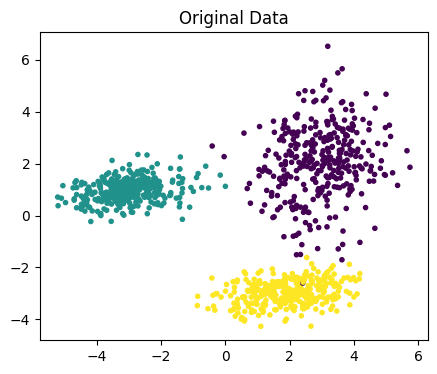

In [3]:
# Visualizing the data

plt.figure(figsize=(5,4))
plt.scatter(data[:,0],data[:,1],c=correct_labels,marker='.')
plt.title("Original Data")
plt.show()

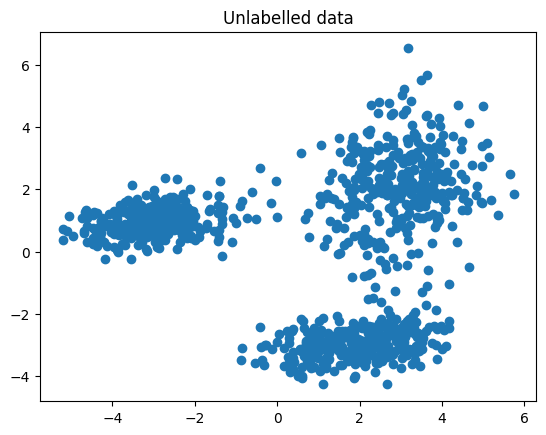

In [4]:
# Visualizing the unlabelled data

plt.scatter(data[:,0],data[:,1],marker='o')
plt.title("Unlabelled data")
plt.show()

In [5]:
# defining the distance function
def dist_sq(x1,x2):
    s = 0.0
    for i in range(len(x1)):
        s+=(x1[i]-x2[i])**2
    return s

# the function below tells when to stop the loop
def diff_update(labels1,labels2):
    k = 0
    for i in range(len(labels1)):
        if np.abs(labels1[i]-labels2[i])!=0:
            k+=1
    return k

# this function returns the centers of the clusters
def cluster_centers(data,ass_labels):
    s0,s1,s2,n0,n1,n2 = 0,0,0,0,0,0
    for i in range(len(data)):
        if ass_labels[i]==0:
            s0=s0+data[i]
            n0=n0+1
        elif ass_labels[i]==1:
            s1=s1+data[i]
            n1=n1+1
        else:
            s2=s2+data[i]
            n2=n2+1
    return np.array([s0/n0,s1/n1,s2/n2]),np.array([n0,n1,n2])

# Defining cluster mean distance function

def mean_dist_from_cluster(data,ass_labels,point,data_label):
    mean_dist = 0
    for j in range(len(data)):
        if ass_labels[j]==data_label:
            mean_dist+=dist_sq(point,data[j])
    mean_dist = mean_dist/ns[data_label]
    return mean_dist

# Defining Silhouette Measure

def Silhouette_meas(data,ass_labels):
    S_i_array = np.zeros((len(data),),float)
    for i in range(len(data)):
        a,b = 0,0
        data_label = ass_labels[i]
        a = mean_dist_from_cluster(data,ass_labels,data[i],data_label)
        b_array = np.zeros((len(ns),),float)
        for j in range(len(ns)):
            if j!=data_label:
                b_array[j]=mean_dist_from_cluster(data,ass_labels,data[i],j)
        b = np.sort(b_array)[1]
        if ns[data_label] == 1:
            S_i_array[i]=0
        else:
            S_i_array[i]=(b-a)/max(a,b)

    Silhouette = np.average(S_i_array)
    return Silhouette

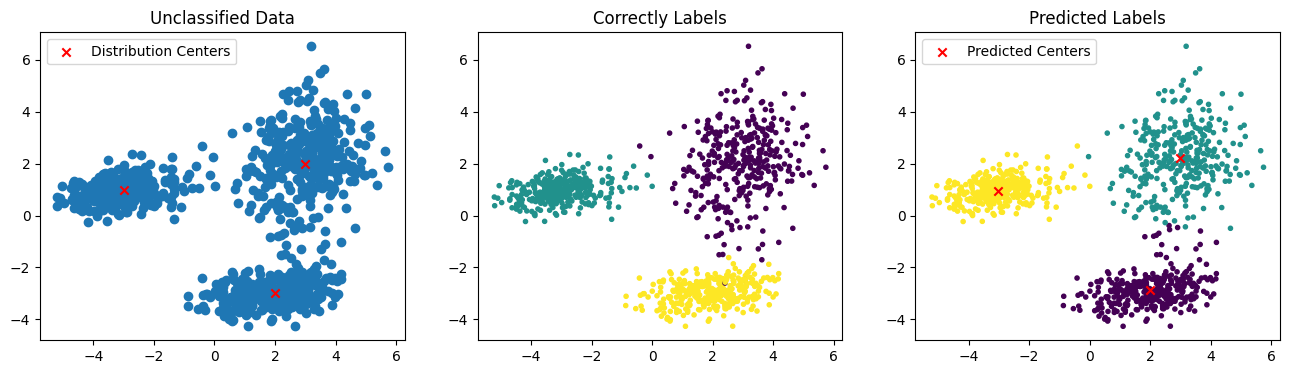

Number of data points mislabelled : 982
Fractional misclassification = 0.982
Silhouette measure = 0.8732802472081264


In [6]:
# defining the classifier algorithm

# randomly assigning cluster labels to data
ass_labels = np.zeros((len(data),),int)
for i in range(len(data)):
    ass_labels[i] = int(3*r.rand())

c = 0
while True:
    old_labels = ass_labels.copy()
    centers,ns = cluster_centers(data,ass_labels)
    for i in range(len(data)):
        dist_from_center = np.zeros((len(centers),),float)
        for j in range(len(centers)):
            dist_from_center[j] = dist_sq(centers[j],data[i])
        ass_labels[i] = list(dist_from_center).index(min(dist_from_center))

    c+=1
    if diff_update(old_labels,ass_labels)==0:
        break

# Visulazing the data

plt.figure(figsize=(16,4))
plt.subplot(1,3,1)
plt.scatter(data[:,0],data[:,1])
plt.scatter([mu1[0],mu2[0],mu3[0]],[mu1[1],mu2[1],mu3[1]],c='red',marker='x',label = 'Distribution Centers')
plt.title('Unclassified Data')
plt.legend()
plt.subplot(1,3,2)
plt.scatter(data[:,0],data[:,1],c = correct_labels,marker = '.')
plt.title('Correctly Labels')
plt.subplot(1,3,3)
plt.scatter(data[:,0],data[:,1],c = ass_labels,marker = '.')
plt.scatter(centers[:,0],centers[:,1],c='red',marker='x',label = 'Predicted Centers')
plt.title('Predicted Labels')
plt.legend()
plt.show()

misclassified_points = diff_update(ass_labels,correct_labels)

print("Number of data points mislabelled :",misclassified_points)
print('Fractional misclassification =',misclassified_points/N)

# The above measure has a visible fault
# We will later define the Silhouette measure


print(f"Silhouette measure =",Silhouette_meas(data,ass_labels))

##### Errors to deal with :
##### 1. Division by zero error : if number of data points in any cluster is zero initially then this error emerges
##### 2. Sometimes the algorithm converges to completely different cluster distribution

##### Possible Improvements :
##### 1. Can introduce a weight function, which depends of the density of the data points in the cluster